In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import date



symbols  = [ 'SPY', "QQQ", "VGK", "SCZ", "EWJ", "EEM", #eq
           'REM', "VNQ", "RWX", # re
           'TIP', "IEF", "TLT", "BWX", #fi
           'DBC', "GLD", #como
           'twtr', 'intc', 'tsm',"VWUSX", "Amc"]

all_stocks = pd.DataFrame()
 
for symbol in symbols:
    tmp_close = yf.download(symbol, 
                      start='2020-01-01', 
                      end= date.today(),
                      interval = "1d",
                      threads = True,
                      progress=False)['Adj Close']
    all_stocks = pd.concat([all_stocks, tmp_close], axis=1)
 
all_stocks.columns=symbols
all_stocks

,SPY,QQQ,VGK,SCZ,EWJ,EEM,REM,VNQ,RWX,TIP,IEF,TLT,BWX,DBC,GLD,twtr,intc,tsm,VWUSX,Amc
2019-12-31,311.803223,210.392792,55.027195,59.418938,57.360989,43.318325,37.135899,86.537407,35.788078,109.723869,107.936615,131.112930,28.201143,15.950000,142.899994,32.049999,56.491619,55.706577,36.390457,7.195854
2020-01-02,314.719177,213.905792,55.487312,59.953213,57.961323,44.196861,37.169258,85.520859,35.861885,110.260384,108.436058,132.593567,28.171774,15.970000,143.949997,32.299999,57.426067,57.566662,36.906452,7.414512
2020-01-03,312.336060,211.946426,54.792431,59.199497,57.322254,43.376259,37.169258,86.052444,35.788078,110.768669,109.160744,134.635559,28.181568,16.160000,145.860001,31.520000,56.727589,55.668232,36.703434,7.275366
2020-01-06,313.527618,213.312027,54.999020,59.237667,57.525593,43.270058,37.227638,86.155029,35.871109,110.486275,109.043221,133.871033,28.230509,16.190001,147.389999,31.639999,56.567127,55.025829,36.999500,7.076585
2020-01-07,312.646057,213.282349,54.726700,59.094559,57.622421,43.241096,37.319370,85.194450,35.741951,110.147438,108.886528,133.212982,28.142405,16.180000,147.970001,32.540001,55.623241,55.917515,36.999500,7.086524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,436.630005,346.799988,62.320000,66.610001,62.939999,46.730000,31.780001,102.540001,33.470001,126.951004,112.019005,139.684998,27.177999,23.870001,178.380005,35.549999,47.700001,107.010002,54.029999,18.860001
2022-03-01,429.980011,341.489990,60.669998,65.209999,62.080002,46.110001,31.490000,102.000000,32.959999,127.860001,113.110001,141.300003,27.190001,24.830000,181.619995,35.560001,46.820000,108.050003,53.110001,18.320000
2022-03-02,437.890015,347.220001,61.610001,66.059998,62.290001,46.189999,32.080002,103.910004,33.430000,127.029999,111.410004,136.470001,26.920000,25.639999,179.729996,34.619999,48.869999,109.610001,53.660000,18.530001
2022-03-03,435.709991,342.260010,59.840000,64.750000,61.980000,45.540001,31.920000,104.760002,33.049999,126.879997,111.889999,137.860001,26.950001,25.920000,180.800003,33.490002,47.930000,108.790001,52.320000,18.059999


In [2]:
returns = np.log(all_stocks/all_stocks.shift(1))
returns.fillna(0)
returns = returns.iloc[1: , :]
returns.iloc[0:253 , :]

,SPY,QQQ,VGK,SCZ,EWJ,EEM,REM,VNQ,RWX,TIP,IEF,TLT,BWX,DBC,GLD,twtr,intc,tsm,VWUSX,Amc
2020-01-02,0.009308,0.016559,0.008327,0.008951,0.010412,0.020078,0.000898,-0.011816,0.002060,0.004878,0.004617,0.011230,-0.001042,0.001253,0.007321,0.007770,0.016406,0.032845,0.014080,0.029934
2020-01-03,-0.007601,-0.009202,-0.012602,-0.012651,-0.011087,-0.018742,0.000000,0.006197,-0.002060,0.004599,0.006661,0.015283,0.000348,0.011827,0.013181,-0.024445,-0.012238,-0.033534,-0.005516,-0.018945
2020-01-06,0.003808,0.006422,0.003763,0.000645,0.003541,-0.002451,0.001569,0.001191,0.002317,-0.002553,-0.001077,-0.005695,0.001735,0.001855,0.010435,0.003800,-0.002833,-0.011607,0.008034,-0.027703
2020-01-07,-0.002816,-0.000139,-0.004964,-0.002419,0.001682,-0.000670,0.002461,-0.011212,-0.003607,-0.003071,-0.001438,-0.004928,-0.003126,-0.000618,0.003927,0.028048,-0.016827,0.016075,0.000000,0.001404
2020-01-08,0.005315,0.007488,0.002570,-0.000323,0.000168,0.005788,-0.002909,0.003060,-0.007254,-0.000940,-0.002341,-0.006633,-0.003135,-0.014944,-0.007530,0.015551,0.000679,0.007346,0.008650,-0.074216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.003883,0.004403,0.002495,0.004881,-0.003640,-0.004379,-0.004414,0.008717,0.002380,0.000393,0.001420,0.003950,0.001934,0.002743,0.003977,-0.006096,0.010679,0.021075,0.001820,-0.019724
2020-12-28,0.008554,0.010028,0.006789,0.004269,0.010128,0.002789,0.006927,0.005943,0.006221,0.000707,0.000083,0.000445,-0.000322,-0.006183,-0.003636,0.008487,0.000000,0.001697,-0.004404,-0.048989
2020-12-29,-0.001910,0.000895,0.007234,0.008193,0.012406,0.014809,-0.012630,-0.008569,0.008528,-0.000471,-0.000167,-0.001272,0.003216,0.002753,0.003636,-0.001287,0.048112,-0.005574,-0.001523,-0.042742
2020-12-30,0.001426,0.000032,-0.001311,0.001937,0.000446,0.013240,0.006335,0.005483,0.004674,0.000785,0.000668,0.002161,0.005125,0.006167,0.007626,-0.000552,-0.013043,0.031151,0.002436,-0.058444


Prix des actions à l'instant t-1

In [3]:
vp = all_stocks[-1::].values[0]
vp

array([432.17001343, 337.29998779,  57.31000137,  62.93999863,
        61.18000031,  44.61999893,  31.73999977, 105.23999786,
        32.40999985, 127.84999847, 113.        , 140.24000549,
        26.89999962,  27.01000023, 183.67999268,  33.38999939,
        48.06999969, 105.05999756,          nan,  16.56999969])

Initialisation des variables

In [59]:
from scipy.optimize import minimize, Bounds

def init():
    
    global cash, argent_gagne, couts_transaction, s, argent_fait, pf_value, pos, pos2, Money
    
    # Paramètres modifiables

    lamb = 0.01 # Coûts de transaction ; faire attention car sinon il n'y a pas de mouvements de position
    alpha = 100 # importance accordée à l'expected return
    Money = 1000 # argent alloué pour l'investissement initial
    Pos_max_par_actif = 1000 # quantité maximale d'argent investi par actif

    # Variables utilisées dans l'algorithme

    cash = 0
    win = 0
    argent_gagne = 0
    cout = 0
    couts_transaction = 0
    s = 0
    nb_actifs = returns.shape[1]
    argent_fait = []
    pf_value = 0

    # pos = portefeuille initialement vide
    pos = np.array([0 for i in range(nb_actifs)])
    pos2 = np.array([0 for i in range(nb_actifs)])


Fonction objectif et coûts de transaction

In [60]:
def objective_corr(pos):
    global s
    
    s = pos@correl_matrix@pos - alpha*expected_returns@pos
    
    # print('\033[92m'+"Coûts de transaction: "+str(TC(Pos,pos))+'\033[0m')
    # print('\033[93m'+"Return : " + str(returns.mean()@pos) + '\033[0m')
    # print('\033[94m'+"Somme des positions: "+str(vp@pos.T)+'\033[0m')
    # print(f"Les valeurs  du vecteur poids sont:{pos.round(3)}")
    # print(f"Les valeurs de la fonction objectif:{s.round(3)}")
    return s

def TC(pos,pos2):
    return lamb*(np.sum(np.array([np.abs(pos2[i]-pos[i]) for i in range(nb_actifs)])))

 
# Every stock can get any position from 0 to Pos_max_par_actif
bounds = Bounds(0, Pos_max_par_actif)

Import des données roulantes à l'étape i

In [61]:
def import_donnees(etape):
    global expected_returns, correl_matrix, vp, vp2
    
    # import des données roulantes
    log_returns = returns.iloc[etape:253+etape , :]
    # calcul des expected returns (on prend une période plus courte)
    expected_returns = log_returns.iloc[-15:: ,:].mean()

    # calcul de la matrice de corrélation
    correl = log_returns.cov().copy()
    correl_matrix = correl.to_numpy()

    # calcul du vecteur prix des actifs à t (le temps de la décision) et t + 1jour
    vp = all_stocks[253+etape::].values[0]
    vp2 = all_stocks[254+etape::].values[0]


Calcul du portefeuille initial avec l'argent à investir

In [83]:
init()

# "ineq" says that the inequality must be non-negative.

cons = ({"type":"ineq", "fun": lambda x: Money - np.sum(np.array(x)) }, 
        # The positions must invest no more than the initial money.
        {"type": "ineq", "fun": lambda x: -(TC(pos,x)+ np.sum(x)) + Money},
        # the transactions costs must be covered by the money invested
        
        # The expected daily return of our portfolio and we want to be at greater than 0.003
        #{"type": "ineq", "fun": lambda x: -np.sum(returns.mean()*x)+1})
       )

# calcul des returns, de la matrice de variance, des vecteurs prix
import_donnees(0)

# calcul du vecteur position
p = minimize(objective_corr, pos, 
         method = "SLSQP", 
         bounds= bounds,
         constraints= cons, options={'maxiter': 300, 'ftol': 1e-09})

pos2 = p.x # les positions prises en fin de journée

couts_transaction += TC(pos,pos2)

# affichage des valeurs numériques
print("Argent injecté au départ:", Money)
# print('\033[93m'+"Return : " + str(log_returns.mean()@pos) + '\033[0m')
print('\033[92m'+"Coûts de transaction: "+str(couts_transaction)+'\033[0m')
print('\033[94m'+"Somme des positions: "+str(np.sum(pos2))+'\033[0m')
# print(f"Les valeurs  du vecteur poids sont :{pos2.round(3)}")
# print(f"La valeur de la fonction objectif est :{s.round(3)}")

# mise à jour du vecteur des positions à chaque actualisation des prix
pos = pos2
pos2 = np.array([pos[i]*vp2[i]/vp[i] for i in range(nb_actifs)])
pf_value = np.sum(pos2) # l'argent dont on dispose dans le portefeuille
argent_fait.append(pf_value)
argent_gagne += np.sum(pos2-pos) # sans compter les côuts de transaction, les bénéfices 
# réalisés par l'augmentation des valeurs des actifs
print('\033[95m'+"Argent généré sans TC : "+str(argent_gagne)+'\033[0m')
print('\033[94m'+"Somme des positions: "+str(pf_value)+'\033[0m', "\n")

cash = Money - np.sum(np.array(p.x)) - couts_transaction # l'argent que l'algo décide de ne pas investir
print("cash :", cash.round(6))

Argent injecté au départ: 1000
Coûts de transaction: 9.900990099009874
Somme des positions: 990.0990099009874
Argent généré sans TC : 8.189986551672359
Somme des positions: 998.2889964526598 

cash : 0.0


Calcul de l'optimisation roulante

In [84]:
print('\033[94m'+"Somme des positions: "+str(pf_value)+'\033[0m')
print("cash :", cash.round(6), "\n")

for i in range(1,100):
    print(f"étape{i}")
    global correl_matrix, vp, Money, pf_value, pos, pos2, argent_gagne, expected_returns, cout, win, cash
    
    # actualisation des positions
    pos = pos2
    
    # actualisation des contraintes
    cons = ({"type":"ineq", "fun": lambda x: Money - np.sum(np.array(x)) }, 
        # The positions must invest no more than the initial money.
        # This constraints says that the inequalities (ineq) must be non-negative.
        {"type": "ineq", "fun": lambda x: -(TC(pos,x) + np.sum((x-pos))) + cash },
        # The expected daily return of our portfolio and we want to be at greater than 0.003
        #{"type": "ineq", "fun": lambda x: -np.sum(returns.mean()*x)+1})
       )
    
    # calcul des returns, de la matrice de variance, des vecteurs prix
    import_donnees(i)
    
    # calcul du vecteur position
    p = minimize(objective_corr, pos, 
             method = "SLSQP", 
             bounds= bounds,
             constraints= cons, options={'maxiter': 300, 'ftol': 1e-09})
    
    pos2 = p.x # les positions prises en fin de journée
    
    cout = TC(pos,pos2)
    couts_transaction += cout
    pf2_value = np.sum(pos2)
    
    cash_restant = pf_value + cash - (cout + pf2_value) 
    
    cash = cash_restant # l'argent que l'algo décide de ne pas investir
    print("cash :", cash.round(6))
    
    # affichage des valeurs numériques
    # print('\033[92m'+"Coûts de transaction: "+str(TC(Pos,pos))+'\033[0m')
    # print('\033[93m'+"Return : " + str(log_returns.mean()@pos) + '\033[0m')
    print('\033[92m'+"Coûts de transaction: "+str(couts_transaction)+'\033[0m')
    print('\033[94m'+"Somme des positions: "+str(pf2_value)+'\033[0m')
    # print(f"Les valeurs  du vecteur poids sont:{pos2.round(3)}")
    # print(f"Les valeurs de la fonction objectif:{s.round(3)}")

    # mise à jour du vecteur des positions à chaque actualisation des prix
    pos = pos2
    pos2 = np.array([pos[i]*vp2[i]/vp[i] for i in range(nb_actifs)])
    Money = np.sum(pos2) + cash
    argent_fait.append(Money)
    win = np.sum(pos2)-np.sum(pos)
    argent_gagne += win
    pf_value = np.sum(pos2)
    print('\033[95m'+"Argent généré sans TC : "+str(argent_gagne)+'\033[0m')
    print('\033[94m'+"Somme des positions: "+str(pf_value)+'\033[0m')
    print('\033[96m'+"Money :"+str(Money)+'\033[0m', "\n")
    
    """try :
        assert (np.round(1000 + argent_gagne - couts_transaction, 6) == np.round(Money,6))
    except AssertionError :
        print(np.round(1000 + argent_gagne - couts_transaction, 6))
        print(np.round(Money,6))
        break"""

print("\n","fin du calcul")

Somme des positions: 998.2889964526598
cash : 0.0 

étape1
cash : -0.0
Coûts de transaction: 21.564981370611847
Somme des positions: 986.6250051810831
Argent généré sans TC : 11.668061156110252
Somme des positions: 990.103079785521
Money :990.1030797854985 

étape2
cash : -0.0
Coûts de transaction: 26.50063588260799
Somme des positions: 985.1674252736652
Argent généré sans TC : 5.708854486341419
Somme des positions: 979.2082186038964
Money :979.2082186037335 

étape3
cash : -0.0
Coûts de transaction: 29.736136010981518
Somme des positions: 975.9727184753604
Argent généré sans TC : 20.9574589475671
Somme des positions: 991.221322936586
Money :991.2213229365857 

étape4
cash : -0.0
Coûts de transaction: 33.46567772566918
Somme des positions: 987.4917812219014
Argent généré sans TC : 2.6449000438012256
Somme des positions: 969.1792223181355
Money :969.1792223181321 

étape5
cash : 30.88078
Coûts de transaction: 40.15049346653772
Somme des positions: 931.6136265280388
Argent généré sans TC

cash : 253.71172
Coûts de transaction: 197.76668906057927
Somme des positions: 1543.6618166102012
Argent généré sans TC : 1020.5465470827096
Somme des positions: 1569.068138167549
Money :1822.7798580221308 

étape35
cash : 344.303097
Coûts de transaction: 198.6817534799459
Somme des positions: 1477.561696230884
Argent généré sans TC : 1025.563382318587
Somme des positions: 1482.5785314667614
Money :1826.8816288386415 

étape36
cash : 369.61306
Coûts de transaction: 199.98620882329988
Somme des positions: 1455.9641139236394
Argent généré sans TC : 1034.3655211424164
Somme des positions: 1464.7662527474688
Money :1834.379312319117 

étape37
cash : 450.86864
Coûts de transaction: 201.98188410601827
Somme des positions: 1381.5149975141662
Argent généré sans TC : 1034.0358623439263
Somme des positions: 1381.1853387156762
Money :1832.0539782379085 

étape38
cash : 904.704826
Coûts de transaction: 207.58526615520609
Somme des positions: 921.7457696925462
Argent généré sans TC : 1035.767104542

cash : -0.0
Coûts de transaction: 385.4097250656526
Somme des positions: 1620.8239745775693
Argent généré sans TC : 1003.8129575492536
Somme des positions: 1618.403232483669
Money :1618.4032324836014 

étape68
cash : -0.0
Coûts de transaction: 393.6361197987313
Somme des positions: 1610.1768377509056
Argent généré sans TC : 1015.6064770633405
Somme des positions: 1621.9703572649926
Money :1621.9703572646097 

étape69
cash : 0.0
Coûts de transaction: 397.4816509787124
Somme des positions: 1618.1248260844218
Argent généré sans TC : 1003.5593367883824
Somme des positions: 1606.0776858094637
Money :1606.0776858096704 

étape70
cash : 0.0
Coûts de transaction: 415.28117734327236
Somme des positions: 1588.27815944497
Argent généré sans TC : 1018.7713000399355
Somme des positions: 1603.490122696523
Money :1603.4901226966633 

étape71
cash : -0.0
Coûts de transaction: 436.0245591439022
Somme des positions: 1582.7467408960365
Argent généré sans TC : 1011.949878841635
Somme des positions: 1575.9

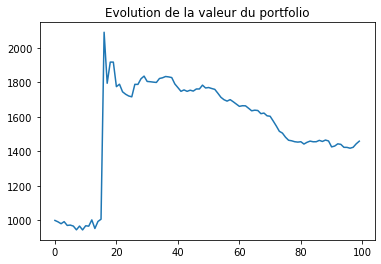

In [86]:
plt.plot(argent_fait)
plt.title("Evolution de la valeur du portfolio")
plt.show()

In [87]:
pos.round(3)

array([   0.   ,    0.   ,  321.898,    0.   ,    0.   ,    0.   ,
          0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
          0.   ,    0.   , 1000.   ,   22.043,    0.   ,    0.   ,
          0.   ,   98.254])

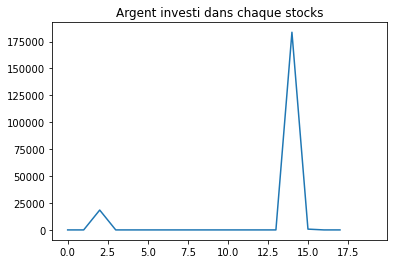

L'argent est le plus investi dans l'action: VWUSX


In [88]:
plt.plot([p.x[i] * all_stocks[-1::].values[0][i] for i in range(len(p.x))])
plt.title("Argent investi dans chaque stocks")
plt.show()
print("L'argent est le plus investi dans l'action: "+symbols[np.argmax([p.x[i] * all_stocks[-1::].values[0][i] for i in range(len(p.x))])])

In [89]:
# On a bien investi au plus Money=1000
np.dot(vp,p.x.T)

202364.2809711128

In [90]:
# Le returns avec une telle repartition de portefeuille est de:
np.sum(returns.mean()*p.x)

0.6331934609985869

In [91]:
print("Nombre d'action acheté pour chaque symbols: ")
r = pd.DataFrame([symbols,p.x])
for i in range(len(symbols)):
    print(symbols[i],p.x[i].round(3))

Nombre d'action acheté pour chaque symbols: 
SPY 0.0
QQQ 0.0
VGK 321.898
SCZ 0.0
EWJ 0.0
EEM 0.0
REM 0.0
VNQ 0.0
RWX 0.0
TIP 0.0
IEF 0.0
TLT 0.0
BWX 0.0
DBC 0.0
GLD 1000.0
twtr 22.043
intc 0.0
tsm 0.0
VWUSX 0.0
Amc 98.254
